# Preface

# Преимущества и недостатки квантовых вычислений

# Потенциал квантовых вычислений в экономической сфере

# Обзор аппаратных и программных решений в сфере квантовых вычислений

## Аппаратные решения

### Базовая единица: Кубит (Qubit)

**Кубит (Quantum Bit)** — фундаментальная единица квантовой информации.

В отличие от классического бита, который всегда находится в одном из двух состояний ($0$ или $1$), кубит использует принцип **суперпозиции**. Он может находиться в состоянии, представляющем собой линейную комбинацию $0$ и $1$ одновременно.



**Математическое представление:**
Состояние кубита $|\psi\rangle$ описывается вектором:
$$|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$$
Где $\alpha$ и $\beta$ — комплексные числа (амплитуды вероятности), такие что $|\alpha|^2 + |\beta|^2 = 1$.

**Визуализация (Сфера Блоха):**
Геометрически состояние кубита можно представить как точку на поверхности сферы единичного радиуса.
* Северный полюс: $|0\rangle$
* Южный полюс: $|1\rangle$
* Любая точка на экваторе: Равновероятная суперпозиция.



> **Почему это важно для финансов?**
> Благодаря суперпозиции и запутанности, система из $N$ кубитов может обрабатывать $2^N$ состояний одновременно. Это дает экспоненциальное ускорение при переборе вариантов (например, при поиске оптимальной структуры портфеля из сотен активов), что невозможно на классических компьютерах.

# Аппаратное обеспечение квантовых вычислений (Hardware Landscape)

## Глоссарий и ключевые метрики

Перед анализом конкретных устройств необходимо определить метрики, по которым происходит сравнение. В отличие от классических компьютеров (где всё решают тактовая частота и количество ядер), в квантовом мире важен баланс между скоростью, качеством и связностью.

| Термин | Английский | Определение для Финтеха |
| :--- | :--- | :--- |
| **Точность вентиля** | **Gate Fidelity** | Вероятность безошибочного выполнения одной операции. <br> *Бенчмарк:* >99.9%. Если ниже — результаты длинных алгоритмов превращаются в случайный шум. |
| **Время когерентности** | **Coherence Time** | "Время жизни" кубита ($T_1, T_2$), пока он сохраняет квантовое состояние. <br> *Влияние:* Лимит на длину алгоритма. У сверхпроводников это микросекунды, у ионов — секунды. |
| **Связность** | **Connectivity** | Топология связей между кубитами. <br> *All-to-All (Ионы):* Каждый с каждым (идеально для корреляций активов). <br> *Grid (IBM):* Только с соседями (требует лишних SWAP-операций, снижая точность). |
| **Скорость вентиля** | **Gate Speed** | Время выполнения одной операции. <br> *Сверхпроводники:* ~Наносекунды (критично для ML, где нужны тысячи прогонов). <br> *Ионы:* ~Микросекунды (медленно, но точно). |
| **Квантовый объем** | **Quantum Volume (QV)** | Интегральная метрика (IBM), учитывающая число кубитов, связность и ошибки. Честный показатель "полезной" мощности, в отличие от простого количества кубитов. |
| **NISQ** | **Noisy Intermediate-Scale Quantum** | Текущая эра "шумных" квантовых компьютеров (50–1000 кубитов). Они работают без полной коррекции ошибок, но уже способны решать узкие задачи оптимизации. |

## Обзор аппаратных платформ (Hardware Landscape)

Для реализации стратегии QML необходимо понимать ограничения физического уровня. Рынок квантового "железа" фрагментирован, и универсального решения пока нет. Мы сравниваем 5 ключевых технологий по критическим метрикам.

### Ключевые параметры сравнения:
1.  **Точность (Gate Fidelity):** Вероятность выполнения операции без сбоя.
    * *Суть:* Если точность 99%, то на алгоритме из 100 шагов результат превращается в случайный шум. Для коммерческих задач (Advantage) требуется >99.9%.
2.  **Время когерентности (Coherence Time):** "Время жизни" кубита в квантовом состоянии.
    * *Суть:* Определяет, насколько длинный алгоритм мы успеем выполнить, пока кубит не "развалится".
3.  **Связность (Connectivity):** Топология связей между кубитами.
    * *All-to-All:* Идеальный вариант (любой с любым), типичен для ионов.
    * *Nearest Neighbor:* Связь только с соседями (как в процессорах IBM), требует лишних операций SWAP, снижая итоговую точность.
4.  **Масштабируемость (Scalability):** Инженерная сложность добавления новых кубитов на чип (от 100 к 1000 и далее).

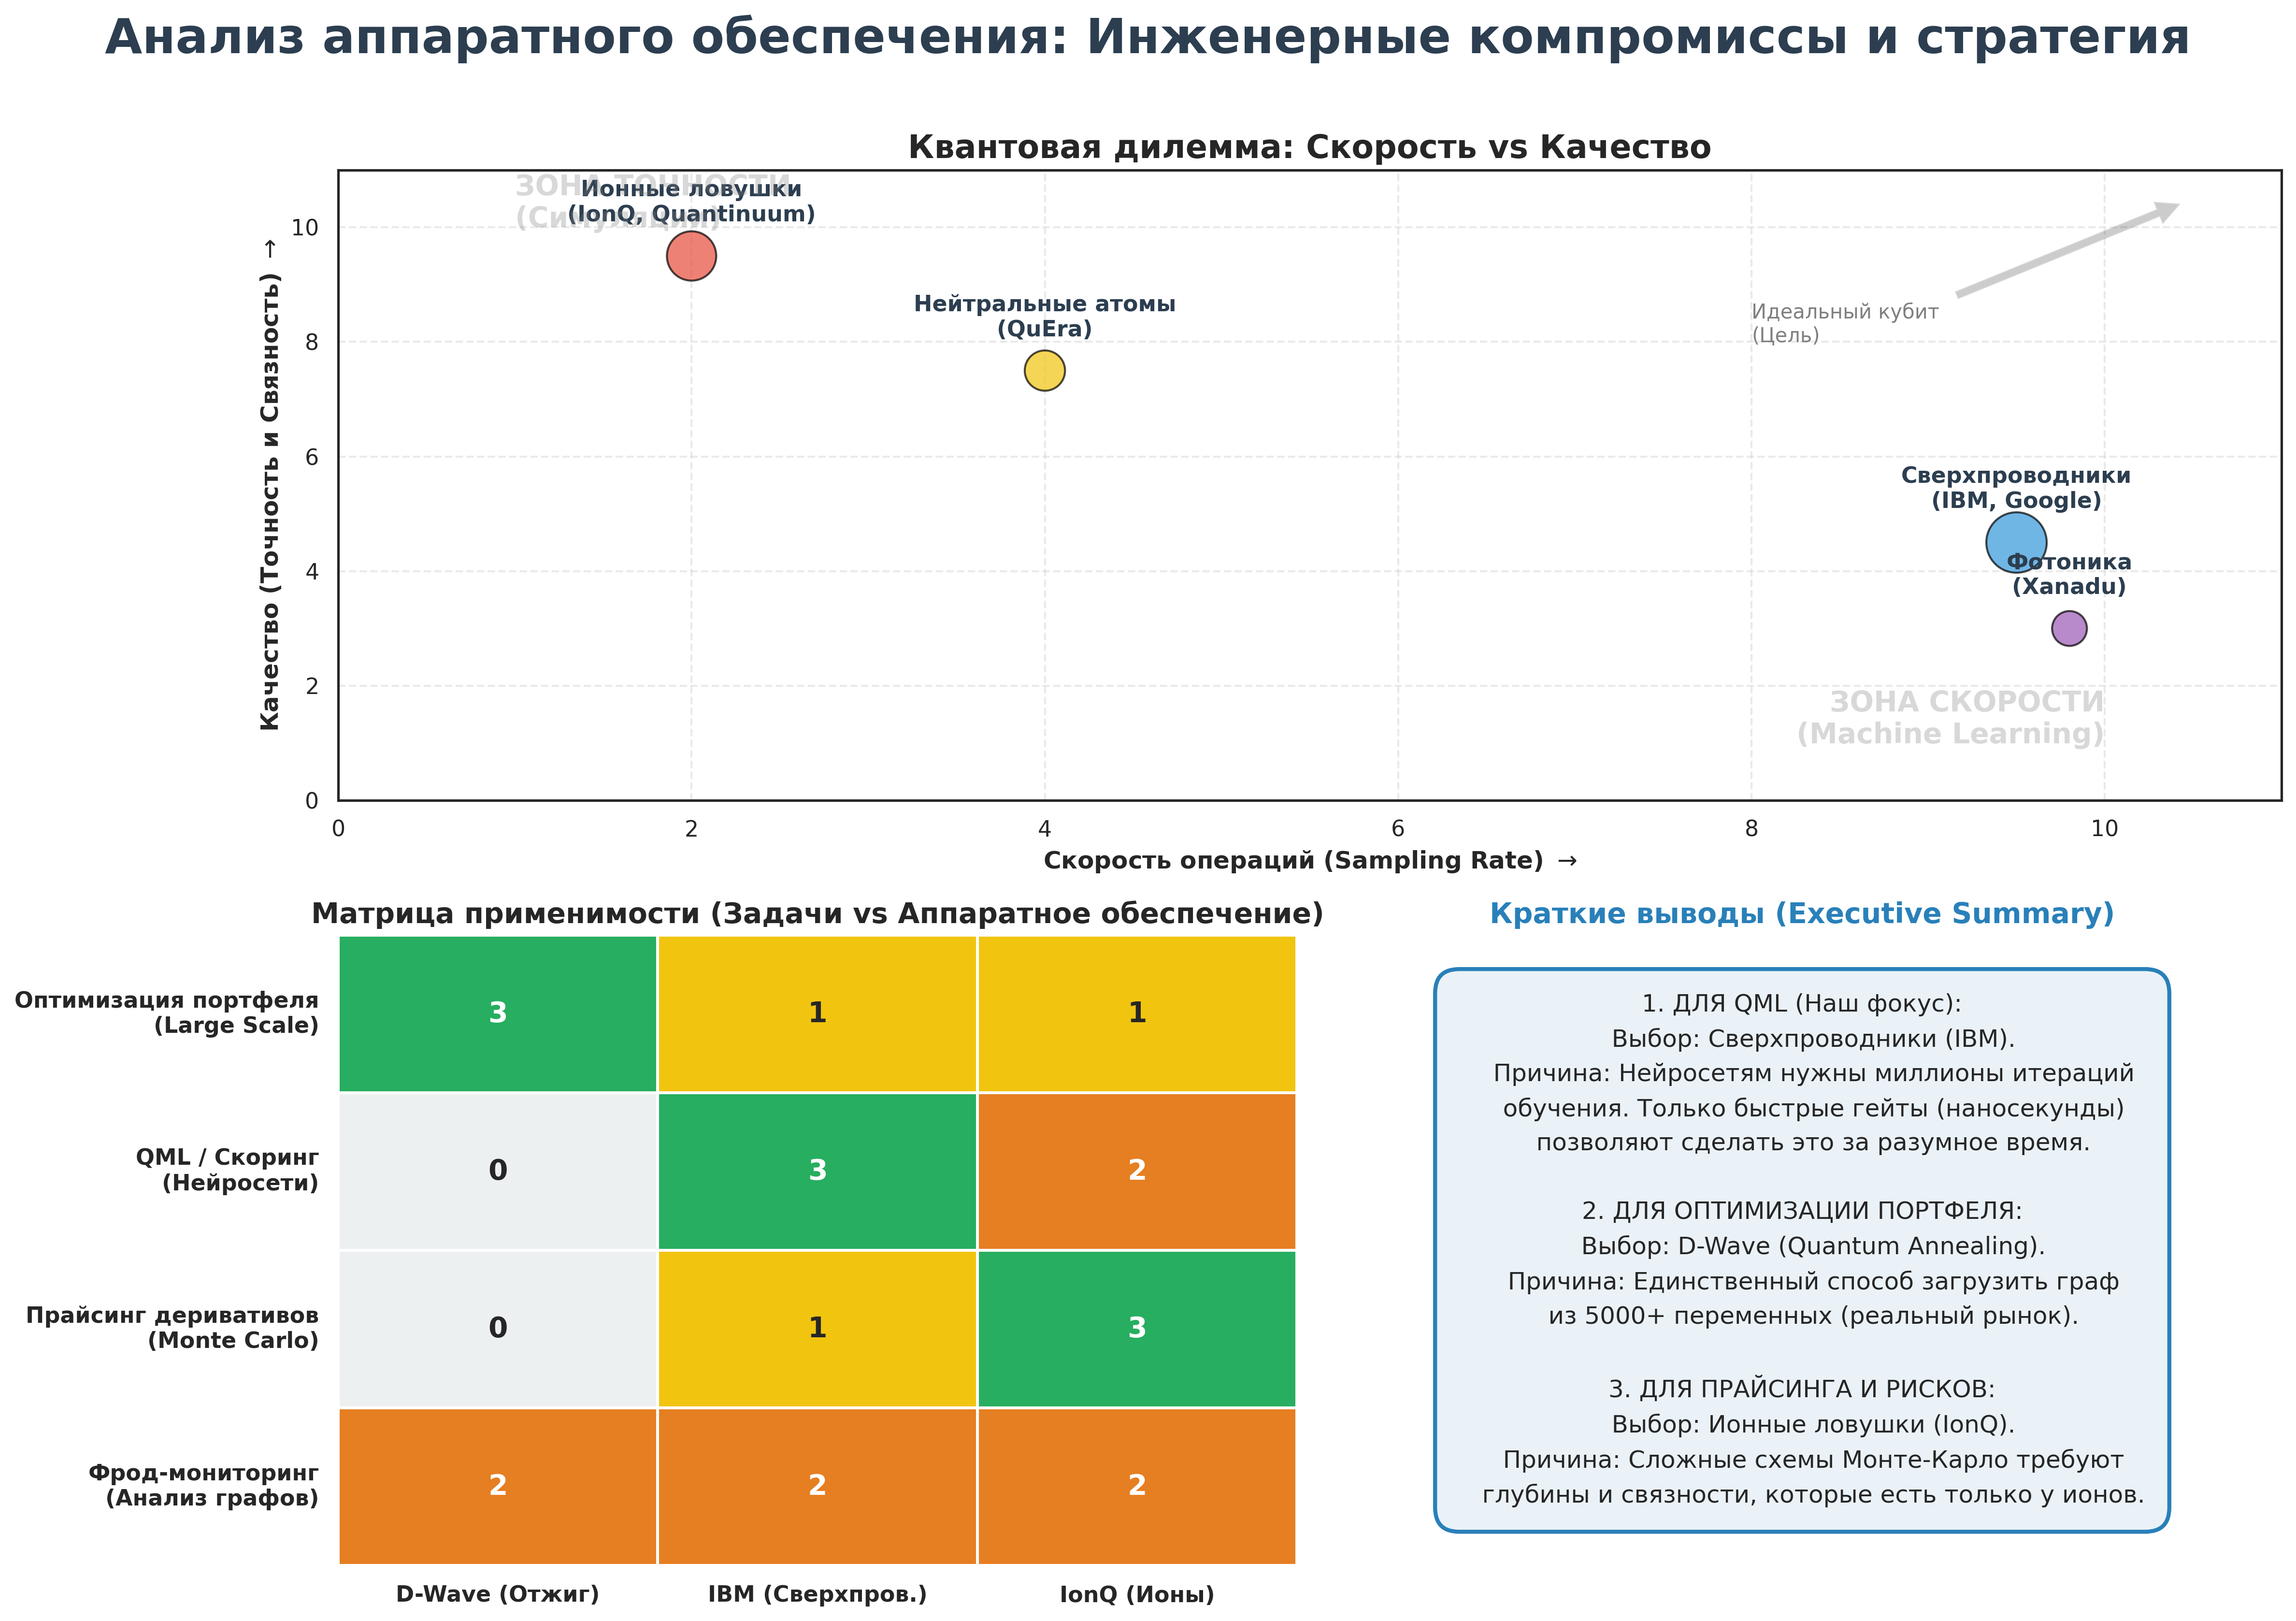

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Настройка стиля
sns.set_theme(style="white", rc={"axes.grid": True, "grid.linestyle": "--", "grid.alpha": 0.4})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['figure.dpi'] = 300


# ДАННЫЕ 1: МАТРИЦА КОМПРОМИССОВ (Trade-off)

tradeoff_data = pd.DataFrame([
    {"Tech": "Сверхпроводники\n(IBM, Google)", "Speed": 9.5, "Quality": 4.5, "Size": 900, "Color": "#3498db"},
    {"Tech": "Ионные ловушки\n(IonQ, Quantinuum)", "Speed": 2.0, "Quality": 9.5, "Size": 600, "Color": "#e74c3c"},
    {"Tech": "Нейтральные атомы\n(QuEra)", "Speed": 4.0, "Quality": 7.5, "Size": 400, "Color": "#f1c40f"},
    {"Tech": "Фотоника\n(Xanadu)", "Speed": 9.8, "Quality": 3.0, "Size": 300, "Color": "#9b59b6"},
])


# ДАННЫЕ 2: STRATEGIC FIT (Применимость)

# 0 = Не подходит, 1 = Слабо, 2 = MVP, 3 = Идеально (Prod)
fit_data = pd.DataFrame([
    {"Task": "Оптимизация портфеля\n(Large Scale)", "D-Wave (Отжиг)": 3, "IBM (Сверхпров.)": 1, "IonQ (Ионы)": 1},
    {"Task": "QML / Скоринг\n(Нейросети)", "D-Wave (Отжиг)": 0, "IBM (Сверхпров.)": 3, "IonQ (Ионы)": 2},
    {"Task": "Прайсинг деривативов\n(Monte Carlo)", "D-Wave (Отжиг)": 0, "IBM (Сверхпров.)": 1, "IonQ (Ионы)": 3},
    {"Task": "Фрод-мониторинг\n(Анализ графов)", "D-Wave (Отжиг)": 2, "IBM (Сверхпров.)": 2, "IonQ (Ионы)": 2},
])
fit_data = fit_data.set_index("Task")


# ВИЗУАЛИЗАЦИЯ

def create_deep_analysis_dashboard_ru():
    fig = plt.figure(figsize=(16, 12))
    gs = fig.add_gridspec(2, 2)
    fig.suptitle('Анализ аппаратного обеспечения: Инженерные компромиссы и стратегия', fontsize=24, weight='bold', color='#2c3e50', y=0.96)

    # ГРАФИК 1: SCATTER PLOT (Trade-offs)
    ax1 = fig.add_subplot(gs[0, :])

    ax1.scatter(tradeoff_data["Speed"], tradeoff_data["Quality"],
                s=tradeoff_data["Size"], c=tradeoff_data["Color"], alpha=0.7, edgecolors="black")

    for i, row in tradeoff_data.iterrows():
        ax1.text(row["Speed"], row["Quality"]+0.6, row["Tech"], ha='center', weight='bold', fontsize=11, color='#2c3e50')

    ax1.set_title("Квантовая дилемма: Скорость vs Качество", fontsize=16, weight='bold')
    ax1.set_xlabel("Скорость операций (Sampling Rate) $\\rightarrow$", fontsize=12, weight='bold')
    ax1.set_ylabel("Качество (Точность и Связность) $\\rightarrow$", fontsize=12, weight='bold')
    ax1.set_xlim(0, 11)
    ax1.set_ylim(0, 11)

    # Зоны
    ax1.text(1, 10, "ЗОНА ТОЧНОСТИ\n(Симуляции)", fontsize=14, color='gray', alpha=0.3, ha='left', weight='bold')
    ax1.text(10, 1, "ЗОНА СКОРОСТИ\n(Machine Learning)", fontsize=14, color='gray', alpha=0.3, ha='right', weight='bold')

    ax1.annotate('Идеальный кубит\n(Цель)', xy=(10.5, 10.5), xytext=(8, 8),
                 arrowprops=dict(facecolor='black', shrink=0.05, alpha=0.2), fontsize=10, color='gray')

    # ГРАФИК 2: HEATMAP (Матрица применимости)
    ax2 = fig.add_subplot(gs[1, 0])

    cmap = sns.color_palette(["#ecf0f1", "#f1c40f", "#e67e22", "#27ae60"])
    sns.heatmap(fit_data, annot=True, cmap=cmap, cbar=False, linewidths=1, linecolor='white',
                ax=ax2, fmt='g', annot_kws={"size": 14, "weight": "bold"})

    ax2.set_title("Матрица применимости (Задачи vs Аппаратное обеспечение)", fontsize=14, weight='bold')
    ax2.set_ylabel("")
    ax2.set_xticklabels(ax2.get_xticklabels(), weight='bold')
    ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, weight='bold')

    # ГРАФИК 3: ВЫВОДЫ (Текст)
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.axis('off')
    ax3.set_title("Краткие выводы (Executive Summary)", fontsize=14, weight='bold', color="#2980b9")

    summary_text = (
        "1. ДЛЯ QML (Наш фокус):\n"
        "   Выбор: Сверхпроводники (IBM).\n"
        "   Причина: Нейросетям нужны миллионы итераций\n"
        "   обучения. Только быстрые гейты (наносекунды)\n"
        "   позволяют сделать это за разумное время.\n\n"
        "2. ДЛЯ ОПТИМИЗАЦИИ ПОРТФЕЛЯ:\n"
        "   Выбор: D-Wave (Quantum Annealing).\n"
        "   Причина: Единственный способ загрузить граф\n"
        "   из 5000+ переменных (реальный рынок).\n\n"
        "3. ДЛЯ ПРАЙСИНГА И РИСКОВ:\n"
        "   Выбор: Ионные ловушки (IonQ).\n"
        "   Причина: Сложные схемы Монте-Карло требуют\n"
        "   глубины и связности, которые есть только у ионов."
    )

    bbox_props = dict(boxstyle="round,pad=1", fc="#eaf2f8", ec="#2980b9", lw=2)
    ax3.text(0.5, 0.5, summary_text, ha='center', va='center', fontsize=12, bbox=bbox_props, linespacing=1.6)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

create_deep_analysis_dashboard_ru()

## Программный ландшафт (Software Landscape)

Выбор фреймворка определяет скорость разработки (Time-to-Market) и возможность интеграции с классическими ML-пайплайнами. Для финансовых задач (QML) критична поддержка **дифференцируемого программирования** — способности системы автоматически вычислять градиенты квантовых цепей для обучения нейросетей.

Мы сравниваем три основных инструмента:
1.  **Qiskit (IBM):** Индустриальный стандарт. Обеспечивает лучший контроль над "железом" (уровень импульсов), но слишком низкоуровневый для быстрого прототипирования ML-моделей.
2.  **PennyLane (Xanadu):** Специализированный фреймворк для QML. Поддерживает нативную интеграцию с **PyTorch** и **TensorFlow**. Позволяет строить гибридные сети (Classical + Quantum) так же просто, как в Keras.
3.  **Ocean SDK (D-Wave):** Узкоспециализированный инструмент для работы с квантовыми аннилерами. Единственный выбор для задач комбинаторной оптимизации (QUBO).

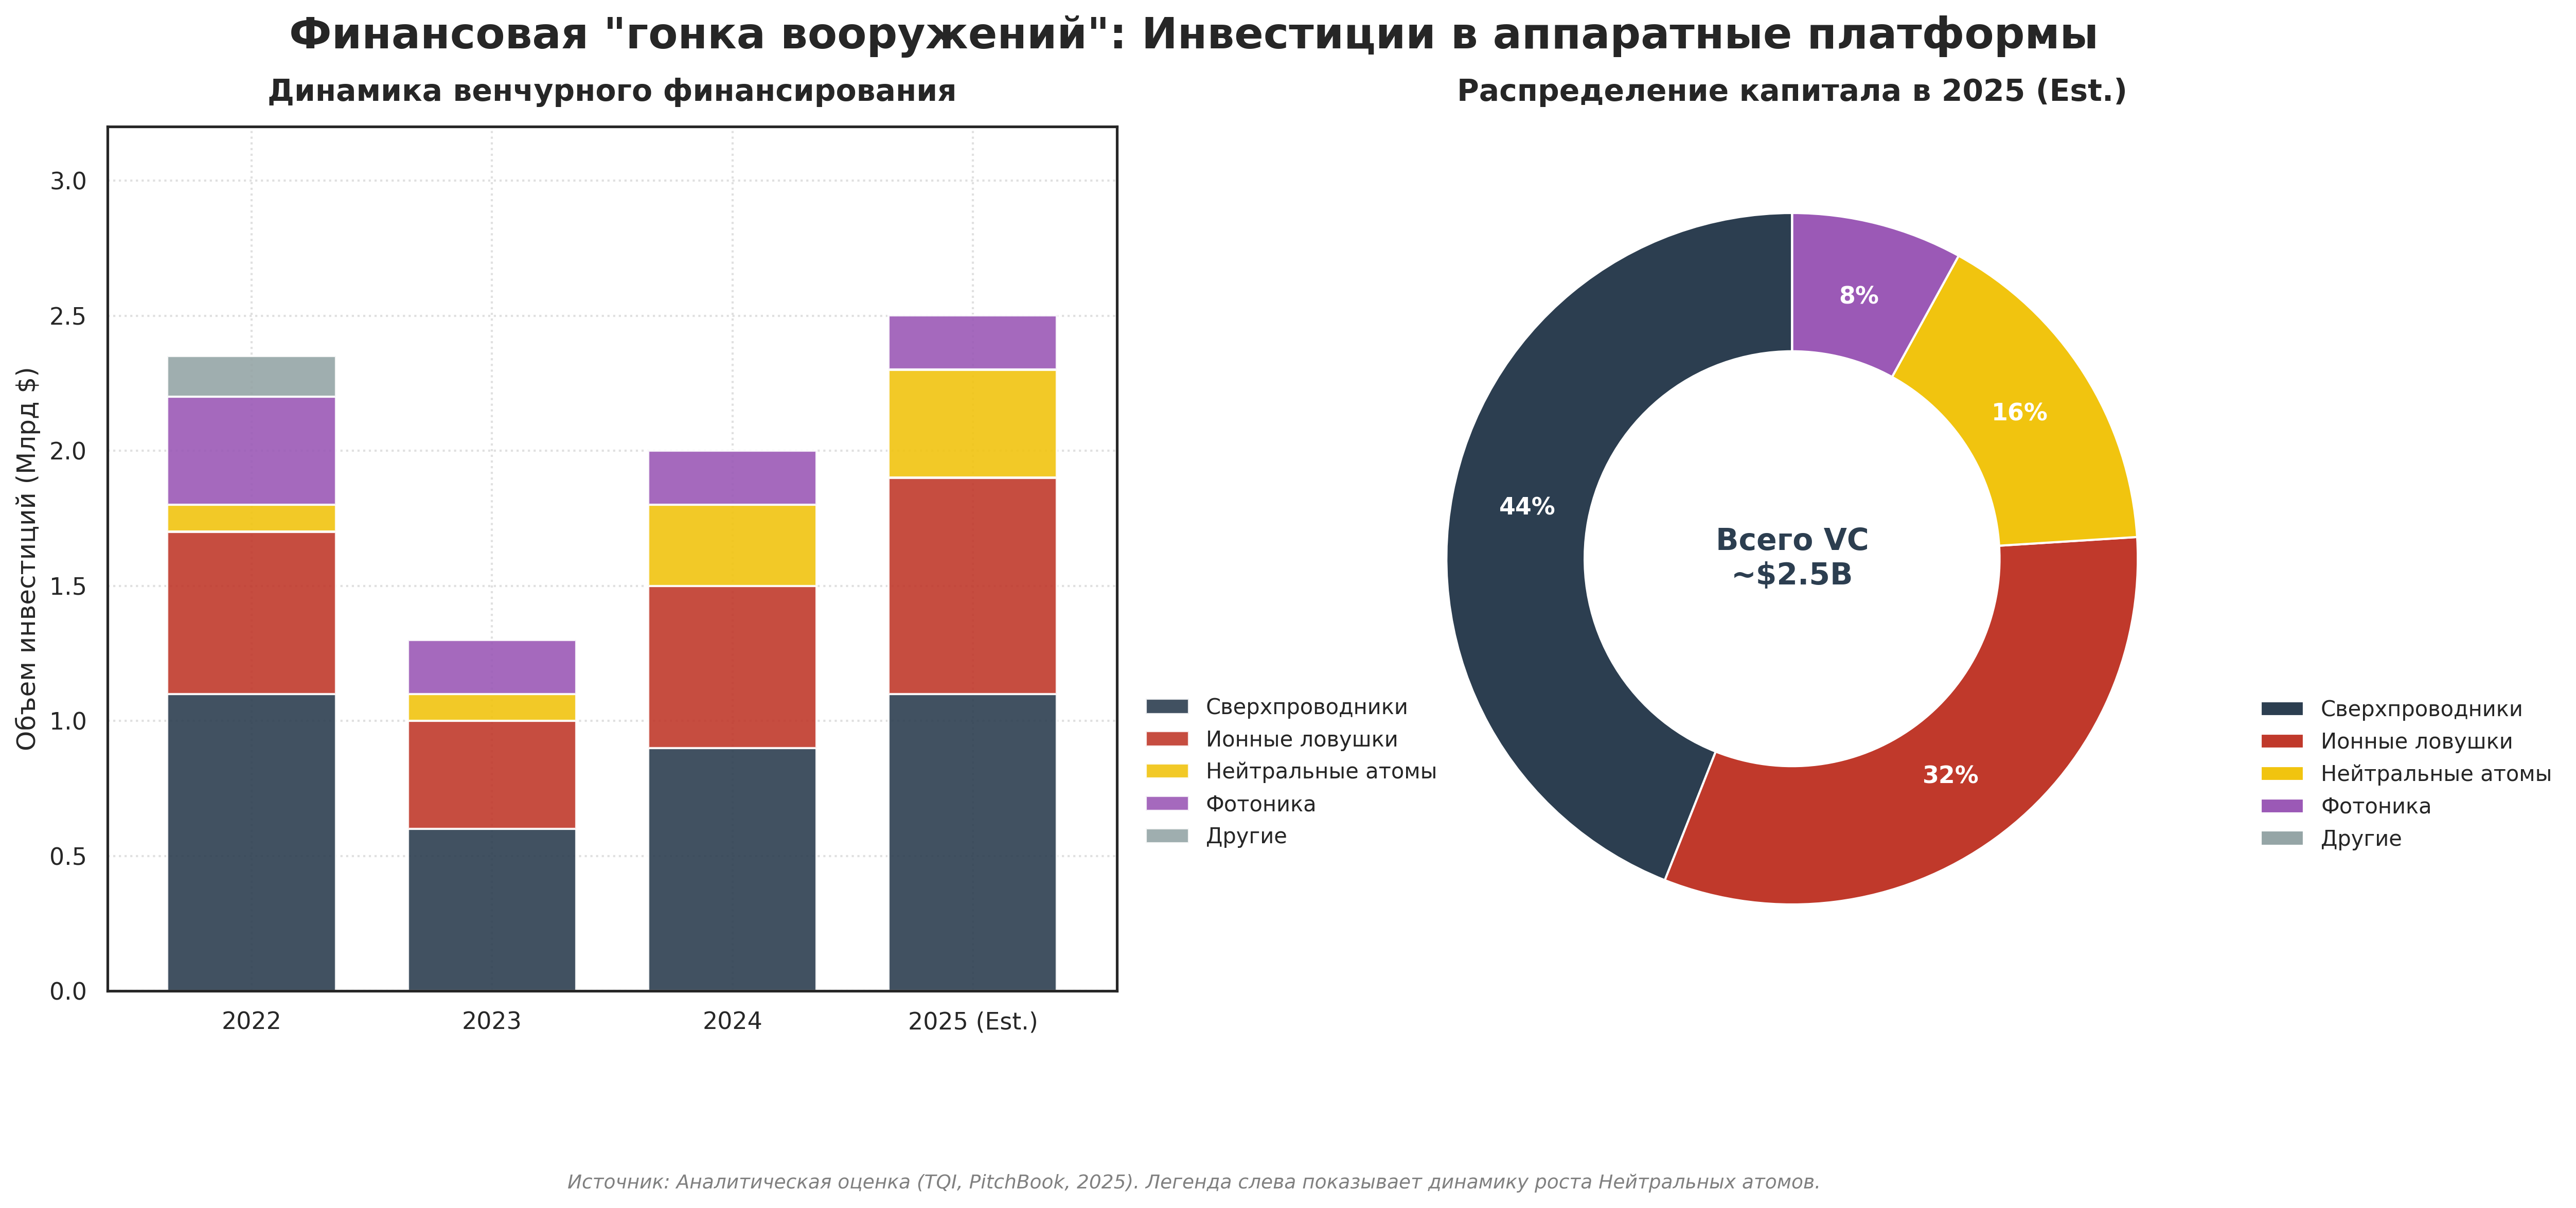

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ДАННЫЕ
trend_data = {
    'Год': ['2022', '2023', '2024', '2025 (Est.)'],
    'Сверхпроводники': [1.1, 0.6, 0.9, 1.1],
    'Ионные ловушки': [0.6, 0.4, 0.6, 0.8],
    'Нейтральные атомы': [0.1, 0.1, 0.3, 0.4],
    'Фотоника': [0.4, 0.2, 0.2, 0.2],
    'Другие': [0.15, 0.0, 0.0, 0.0]
}
df_trend = pd.DataFrame(trend_data).set_index('Год')

split_2025_data = {
    'Технология': ['Сверхпроводники', 'Ионные ловушки', 'Нейтральные атомы', 'Фотоника', 'Другие'],
    'Объем ($B)': [1.1, 0.8, 0.4, 0.2, 0.0],
    'Color': ['#2c3e50', '#c0392b', '#f1c40f', '#9b59b6', '#95a5a6']
}
df_split = pd.DataFrame(split_2025_data)

def create_hw_investment_dashboard():
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['font.family'] = 'sans-serif'

    fig, (ax1, ax2) = plt.subplots(
        1, 2, figsize=(16, 8),
        gridspec_kw={'width_ratios': [1.15, 1]}
    )

    fig.suptitle(
        'Финансовая "гонка вооружений": Инвестиции в аппаратные платформы',
        fontsize=20, fontweight='bold', y=0.97
    )

    # ГРАФИК 1: ДИНАМИКА
    colors = ['#2c3e50', '#c0392b', '#f1c40f', '#9b59b6', '#95a5a6']
    df_trend.plot(
        kind='bar', stacked=True, ax=ax1,
        color=colors, alpha=0.9, width=0.7, edgecolor='white'
    )

    ax1.set_title("Динамика венчурного финансирования", fontsize=14, fontweight='bold', pad=12)
    ax1.set_ylabel("Объем инвестиций (Млрд $)", fontsize=12)
    ax1.set_xlabel("")
    ax1.set_ylim(0, 3.2)
    ax1.tick_params(axis='x', rotation=0)
    ax1.grid(True, linestyle=':', alpha=0.6)

    # ЛЕГЕНДА: справа, снизу под 1-м графиком
    ax1.legend(
        loc='upper left',
        bbox_to_anchor=(1.02, 0.35),
        ncol=1,
        frameon=False,
        fontsize=10,
        borderaxespad=0.0
    )

    #  ГРАФИК 2: СТРУКТУРА 2025 (DONUT)
    vals = df_split['Объем ($B)'].values
    labels = df_split['Технология'].values
    pie_colors = df_split['Color'].values

    def autopct_func(pct):
        return f'{pct:.0f}%' if pct >= 1 else ''

    wedges, _, autotexts = ax2.pie(
        vals,
        labels=None,
        autopct=autopct_func,
        pctdistance=0.78,
        startangle=90,
        colors=pie_colors,
        wedgeprops=dict(width=0.40, edgecolor='white')
    )

    ax2.set_title("Распределение капитала в 2025 (Est.)", fontsize=14, fontweight='bold', pad=12)

    for t in autotexts:
        t.set_fontsize(11)
        t.set_fontweight('bold')
        t.set_color('white')

    centre_circle = plt.Circle((0, 0), 0.55, fc='white')
    ax2.add_artist(centre_circle)
    ax2.text(
        0, 0, "Всего VC\n~$2.5B",
        ha='center', va='center',
        fontsize=14, fontweight='bold',
        color='#2c3e50'
    )

    # Легенда доната справа
    ax2.legend(
        wedges, labels,
        loc='center left',
        bbox_to_anchor=(1.02, 0.25),
        frameon=False,
        fontsize=10
    )

    # Footer
    fig.text(
        0.5, 0.02,
        "Источник: Аналитическая оценка (TQI, PitchBook, 2025). Легенда слева показывает динамику роста Нейтральных атомов.",
        ha='center', fontsize=9, color='gray', style='italic'
    )

    # Отступы
    fig.subplots_adjust(left=0.06, right=0.92, top=0.88, bottom=0.18, wspace=0.25)

    plt.show()

create_hw_investment_dashboard()


## Сводная таблица: Сравнение аппаратных комплексов (Hardware Matrix 2025)

Ниже приведено детальное сравнение 5 различных архитектур. Данные по ценам базируются на публичных тарифах облачных провайдеров (AWS Braket, IBM Cloud) и рыночных ценах на оборудование.

| Характеристика | **IBM Quantum** (System Two) | **IonQ** (Forte) | **D-Wave** (Advantage) | **QuEra** (Aquila) | **SpinQ** (Gemini) |
| :--- | :--- | :--- | :--- | :--- | :--- |
| **Технология** | Сверхпроводники (Transmon) | Ионные ловушки (Ytterbium) | Квантовый отжиг (Annealing) | Нейтральные атомы (Rydberg) | ЯМР (Desktop NMR) |
| **Мощность** | ~127–156 кубитов (Eagle/Heron) | ~36 Algorithmic Qubits (AQ) | 5000+ кубитов | 256 кубитов | 2 кубита |
| **Связность** | **Низкая** (Heavy Hex) <br> *Требует SWAP-гейтов* | **Идеальная** (All-to-All) <br> *Любой с любым* | **Специфичная** (Pegasus) <br> *Графовая структура* | **Динамическая** <br> *Программируемая геометрия* | Полная (в рамках 2 кубитов) |
| **Скорость (Gate)** | **Очень быстро** (~300 нс) | **Медленно** (~100 мкс) | N/A (Время отжига ~20 мкс) | Средне (~1 мкс) | Очень медленно (мс) |
| **Точность (Fidelity)** | ~99.8% (нужна коррекция) | **>99.9% (Лидер рынка)** | N/A (Вероятностный минимум) | ~99.5% | Низкая (образовательная) |
| **Доступность** | Облако (IBM Cloud) | Облако (AWS, Azure, Google) | Облако (Leap, AWS) | Облако (AWS Braket) | **В наличии** (Физическая покупка) |
| **Модель оплаты** | Runtime (~$1.6/сек) | Pay-per-shot ($0.03/shot) | Подписка / Время QPU | Pay-per-task ($0.30 + shots) | Разовая покупка (~$8,500) |
| **Финтех-кейсы** | **QML / Нейросети** (VQE, QGAN) | **Прайсинг / Риски** (Monte Carlo) | **Оптимизация портфеля** (QUBO) | **Графовые задачи** (Фрод) | **Обучение сотрудников** |

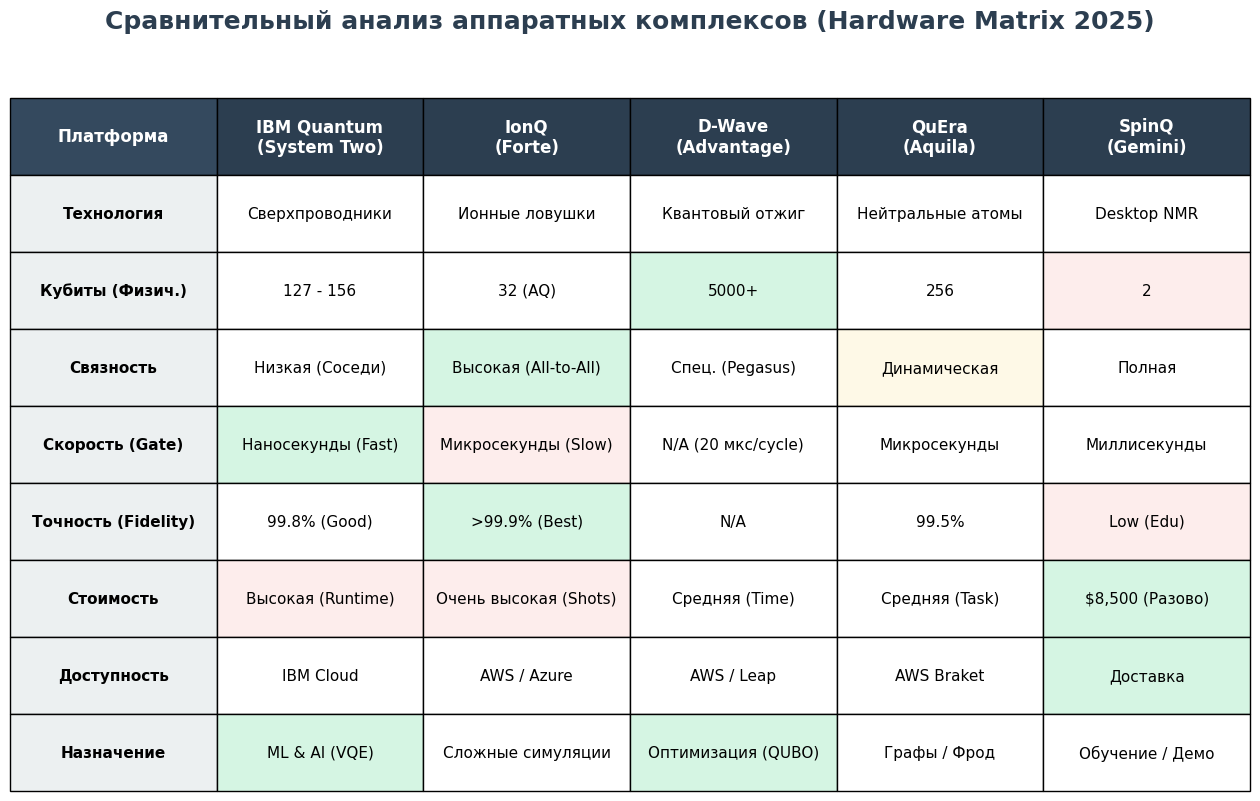

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

def create_full_comparison_table():
    # Данные для таблицы
    data = [
        ["Платформа", "IBM Quantum\n(System Two)", "IonQ\n(Forte)", "D-Wave\n(Advantage)", "QuEra\n(Aquila)", "SpinQ\n(Gemini)"],
        ["Технология", "Сверхпроводники", "Ионные ловушки", "Квантовый отжиг", "Нейтральные атомы", "Desktop NMR"],
        ["Кубиты (Физич.)", "127 - 156", "32 (AQ)", "5000+", "256", "2"],
        ["Связность", "Низкая (Соседи)", "Высокая (All-to-All)", "Спец. (Pegasus)", "Динамическая", "Полная"],
        ["Скорость (Gate)", "Наносекунды (Fast)", "Микросекунды (Slow)", "N/A (20 мкс/cycle)", "Микросекунды", "Миллисекунды"],
        ["Точность (Fidelity)", "99.8% (Good)", ">99.9% (Best)", "N/A", "99.5%", "Low (Edu)"],
        ["Стоимость", "Высокая (Runtime)", "Очень высокая (Shots)", "Средняя (Time)", "Средняя (Task)", "$8,500 (Разово)"],
        ["Доступность", "IBM Cloud", "AWS / Azure", "AWS / Leap", "AWS Braket", "Доставка"],
        ["Назначение", "ML & AI (VQE)", "Сложные симуляции", "Оптимизация (QUBO)", "Графы / Фрод", "Обучение / Демо"]
    ]

    # Создаем фигуру
    fig, ax = plt.subplots(figsize=(16, 10))
    ax.axis('off')
    ax.set_title("Сравнительный анализ аппаратных комплексов (Hardware Matrix 2025)",
                 fontsize=18, weight='bold', color='#2c3e50', y=0.98)

    # Создаем таблицу
    table = ax.table(cellText=data, loc='center', cellLoc='center', bbox=[0, 0, 1, 0.9])

    # Настройка шрифтов
    table.auto_set_font_size(False)
    table.set_fontsize(11)

    # Логика раскраски ячеек
    # Цвета: Зеленый (Лидер), Желтый (Средне), Красный (Слабо/Дорого), Синий (Хедер), Серый (Первый столбец)

    cells = table.get_celld()
    for (row, col), cell in cells.items():
        cell.set_height(0.1) # Высота строк

        # 1. Хедеры
        if row == 0:
            cell.set_text_props(weight='bold', color='white', fontsize=12)
            cell.set_facecolor('#2c3e50')
            if col == 0: cell.set_facecolor('#34495e')

        # 2. Названия параметров
        elif col == 0:
            cell.set_text_props(weight='bold')
            cell.set_facecolor('#ecf0f1')

        # 3. Раскраска данных
        else:
            # IBM
            if col == 1:
                if row == 4: cell.set_facecolor('#d5f5e3')
                if row == 8: cell.set_facecolor('#d5f5e3')
                if row == 6: cell.set_facecolor('#fdedec')

            # IonQ
            if col == 2:
                if row == 3: cell.set_facecolor('#d5f5e3')
                if row == 5: cell.set_facecolor('#d5f5e3')
                if row == 4: cell.set_facecolor('#fdedec')
                if row == 6: cell.set_facecolor('#fdedec')

            # D-Wave
            if col == 3:
                if row == 2: cell.set_facecolor('#d5f5e3')
                if row == 8: cell.set_facecolor('#d5f5e3')

            # QuEra
            if col == 4:
                if row == 3: cell.set_facecolor('#fef9e7')

            # SpinQ
            if col == 5:
                if row == 6: cell.set_facecolor('#d5f5e3')
                if row == 7: cell.set_facecolor('#d5f5e3')
                if row == 2 or row == 5: cell.set_facecolor('#fdedec')

    plt.show()

create_full_comparison_table()

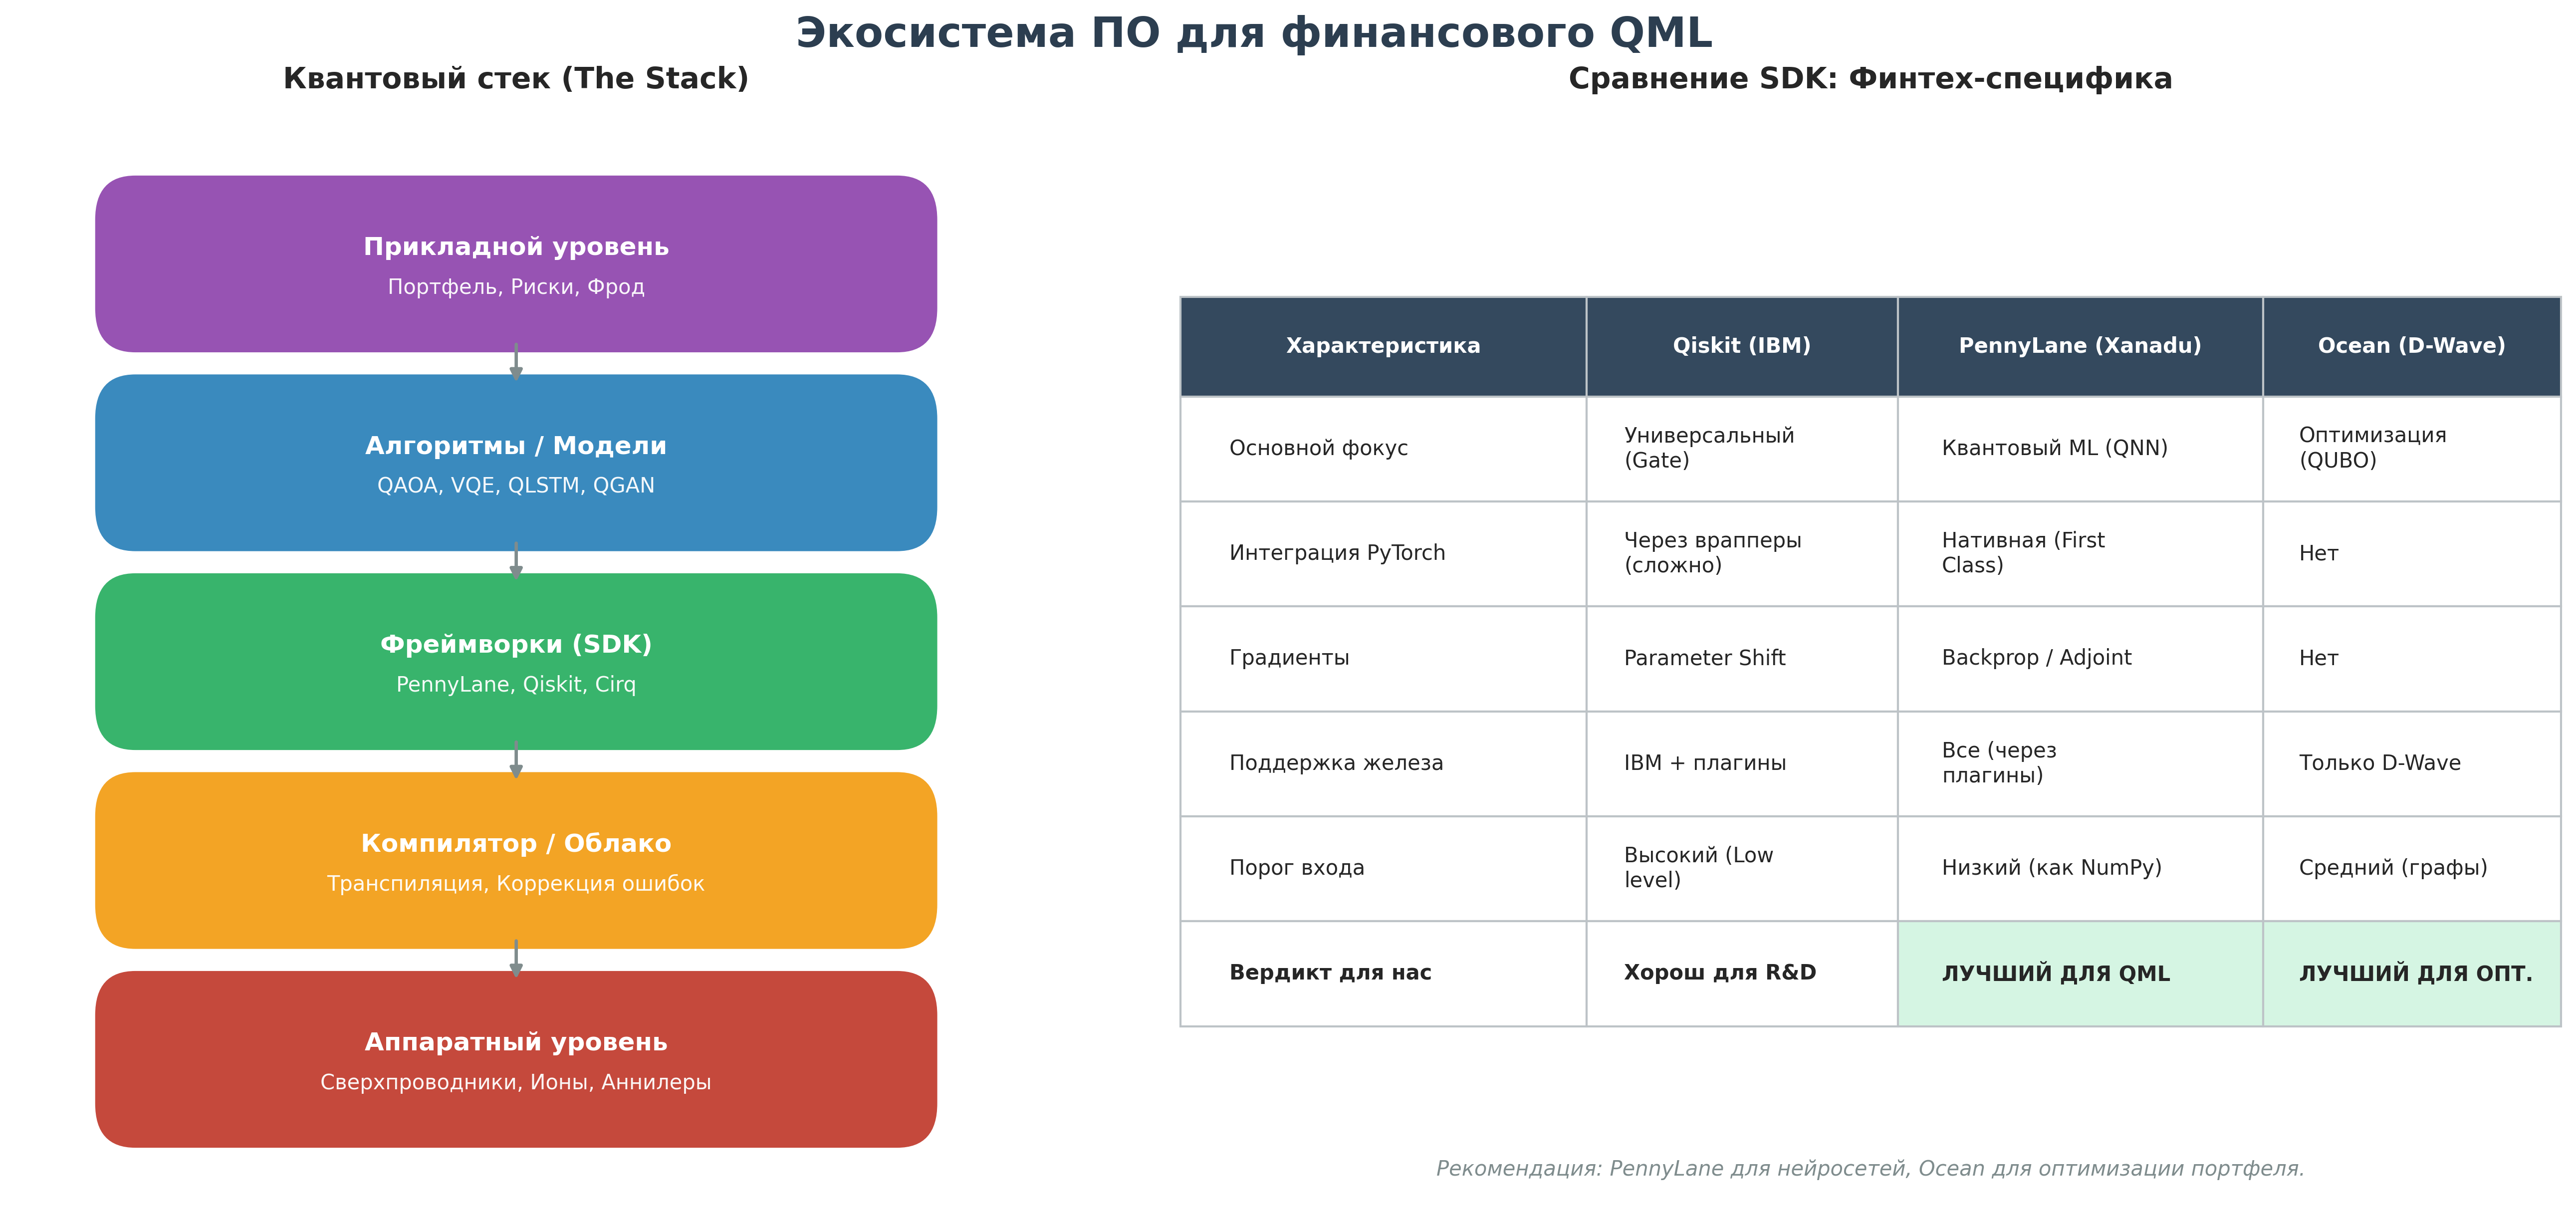

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from textwrap import fill

def create_software_landscape_ru_fixed():
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['font.family'] = 'sans-serif'

    fig, axes = plt.subplots(
        1, 2, figsize=(18, 9),
        gridspec_kw={'width_ratios': [1, 1.35]}
    )
    fig.suptitle('Экосистема ПО для финансового QML',
                 fontsize=20, fontweight='bold', color='#2c3e50', y=0.97)


    # 1) THE STACK

    ax1 = axes[0]
    ax1.axis('off')
    ax1.set_title("Квантовый стек (The Stack)", fontsize=14, fontweight='bold', pad=10)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)

    layers = [
        {"Name": "Прикладной уровень",  "Desc": "Портфель, Риски, Фрод",           "Color": "#8e44ad"},
        {"Name": "Алгоритмы / Модели",  "Desc": "QAOA, VQE, QLSTM, QGAN",           "Color": "#2980b9"},
        {"Name": "Фреймворки (SDK)",    "Desc": "PennyLane, Qiskit, Cirq",         "Color": "#27ae60"},
        {"Name": "Компилятор / Облако", "Desc": "Транспиляция, Коррекция ошибок", "Color": "#f39c12"},
        {"Name": "Аппаратный уровень",  "Desc": "Сверхпроводники, Ионы, Аннилеры", "Color": "#c0392b"},
    ]

    left = 0.10
    width = 0.80
    top = 0.92
    bottom = 0.08
    gap = 0.06
    n = len(layers)
    box_h = (top - bottom - gap * (n - 1)) / n

    for i, layer in enumerate(layers):
        y0 = top - (i + 1) * box_h - i * gap

        box = mpatches.FancyBboxPatch(
            (left, y0), width, box_h,
            boxstyle="round,pad=0.02,rounding_size=0.04",
            fc=layer["Color"], ec="none", alpha=0.92,
            transform=ax1.transAxes
        )
        ax1.add_patch(box)

        ax1.text(0.5, y0 + box_h * 0.62, layer["Name"],
                 ha='center', va='center', fontsize=12, fontweight='bold', color='white',
                 transform=ax1.transAxes)

        ax1.text(0.5, y0 + box_h * 0.32, layer["Desc"],
                 ha='center', va='center', fontsize=10, color='white', alpha=0.95,
                 transform=ax1.transAxes)


        if i < n - 1:
            x = 0.5
            y_mid_top = y0 - gap * 0.15
            y_mid_bot = y0 - gap * 0.85
            ax1.annotate(
                "",
                xy=(x, y_mid_bot), xytext=(x, y_mid_top),
                xycoords=ax1.transAxes, textcoords=ax1.transAxes,
                arrowprops=dict(arrowstyle='-|>', lw=1.6, color='#7f8c8d')
            )


    # 2) TABLE COMPARISON

    ax2 = axes[1]
    ax2.axis('off')
    ax2.set_title("Сравнение SDK: Финтех-специфика", fontsize=14, fontweight='bold', pad=10)

    headers = ["Характеристика", "Qiskit (IBM)", "PennyLane (Xanadu)", "Ocean (D-Wave)"]
    data = [
        ["Основной фокус",     "Универсальный (Gate)",          "Квантовый ML (QNN)",      "Оптимизация (QUBO)"],
        ["Интеграция PyTorch", "Через врапперы (сложно)",       "Нативная (First Class)",  "Нет"],
        ["Градиенты",          "Parameter Shift",               "Backprop / Adjoint",      "Нет"],
        ["Поддержка железа",   "IBM + плагины",                 "Все (через плагины)",     "Только D-Wave"],
        ["Порог входа",        "Высокий (Low level)",           "Низкий (как NumPy)",      "Средний (графы)"],
        ["Вердикт для нас",    "Хорош для R&D",                 "ЛУЧШИЙ ДЛЯ QML",           "ЛУЧШИЙ ДЛЯ ОПТ."]
    ]


    wrap_widths = [18, 16, 18, 16]
    wrapped_data = [[fill(row[i], width=wrap_widths[i]) for i in range(4)] for row in data]

    table = ax2.table(
        cellText=wrapped_data,
        colLabels=headers,
        loc='center',
        cellLoc='left',
        colLoc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)


    col_widths = [0.30, 0.23, 0.27, 0.22]
    nrows = len(data) + 1
    ncols = len(headers)
    for c in range(ncols):
        for r in range(nrows):
            table[(r, c)].set_width(col_widths[c])


    header_h = 0.09
    row_h = 0.095
    for (r, c), cell in table.get_celld().items():
        cell.set_edgecolor('#bdc3c7')
        cell.PAD = 0.12

        if r == 0:
            cell.set_height(header_h)
            cell.set_facecolor('#34495e')
            cell.set_text_props(fontweight='bold', color='white', ha='center', va='center')
        else:
            cell.set_height(row_h)
            cell.set_facecolor('white')
            cell.set_text_props(va='center', linespacing=1.25)


    verdict_row = len(data)
    for c in range(ncols):
        cell = table[(verdict_row, c)]
        cell.set_text_props(fontweight='bold')
        if c in (2, 3):
            cell.set_facecolor('#d5f5e3')


    ax2.text(
        0.5, 0.035,
        "Рекомендация: PennyLane для нейросетей, Ocean для оптимизации портфеля.",
        ha='center', fontsize=10, style='italic', color='#7f8c8d',
        transform=ax2.transAxes
    )

    # Общие отступы
    fig.subplots_adjust(left=0.04, right=0.98, top=0.90, bottom=0.08, wspace=0.15)

    plt.show()

create_software_landscape_ru_fixed()


/tmp/ipython-input-1886934726.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=df_price, x="Provider", y="Total_Cost", palette=df_price["Color"].tolist(), ax=ax1)


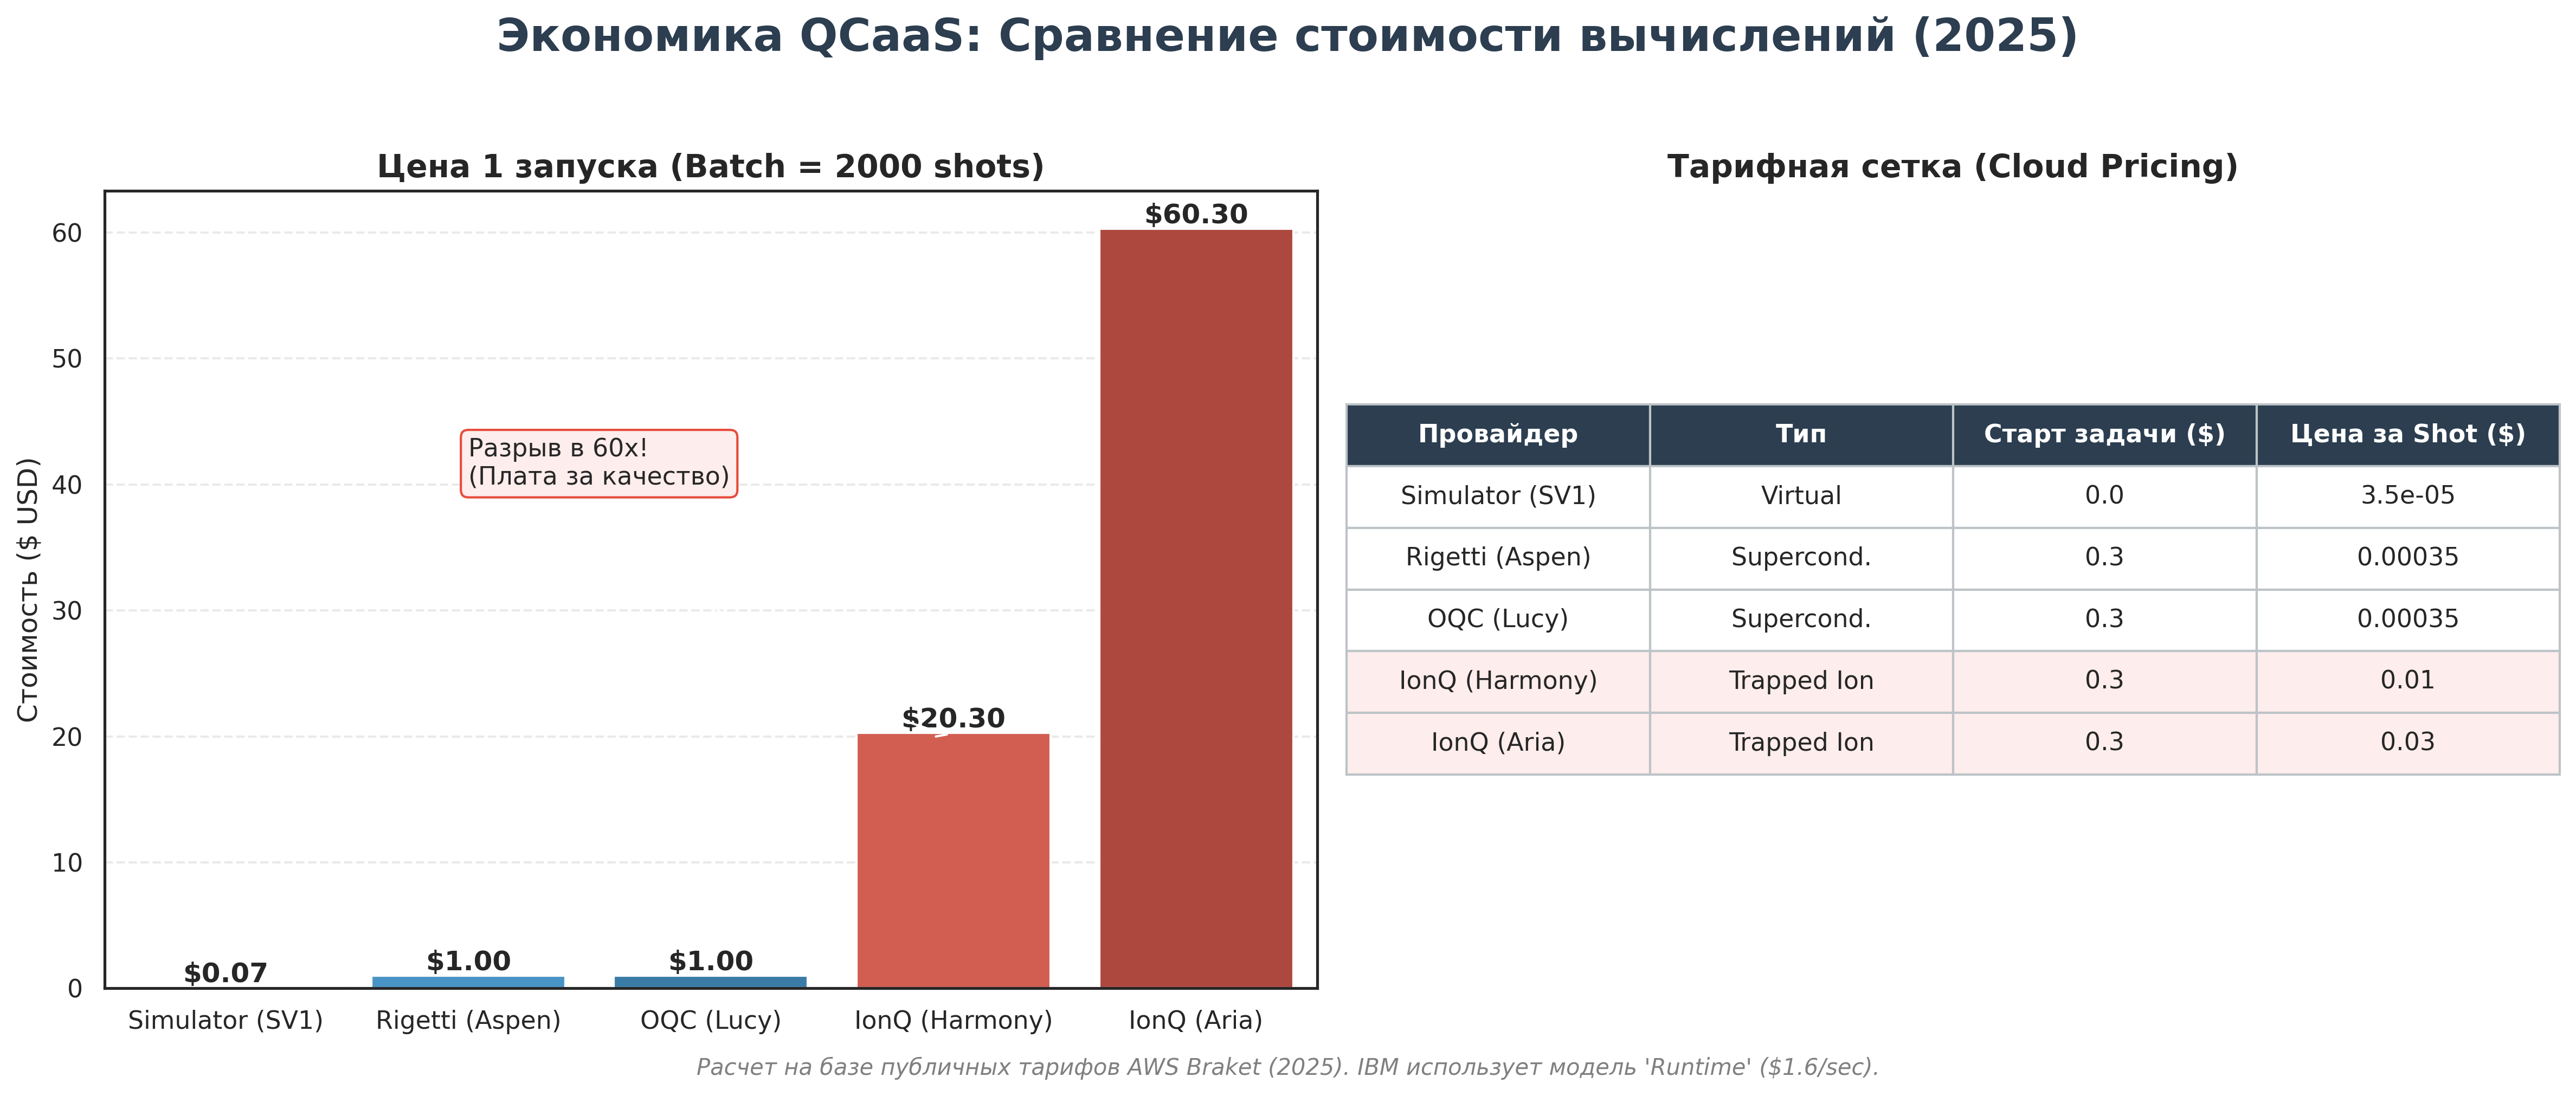

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_cost_analysis():
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle('Экономика QCaaS: Сравнение стоимости вычислений (2025)', fontsize=20, weight='bold', color='#2c3e50')

    # ДАННЫЕ: ТАРИФЫ (на базе AWS Braket / IonQ Cloud)
    # Цены примерные, усредненные по рынку
    pricing_data = [
        {"Provider": "Simulator (SV1)", "Type": "Virtual", "TaskFee": 0.0, "ShotPrice": 0.000035, "Color": "#95a5a6"},
        {"Provider": "Rigetti (Aspen)", "Type": "Supercond.", "TaskFee": 0.30, "ShotPrice": 0.00035, "Color": "#3498db"},
        {"Provider": "OQC (Lucy)", "Type": "Supercond.", "TaskFee": 0.30, "ShotPrice": 0.00035, "Color": "#2980b9"},
        {"Provider": "IonQ (Harmony)", "Type": "Trapped Ion", "TaskFee": 0.30, "ShotPrice": 0.01, "Color": "#e74c3c"},
        {"Provider": "IonQ (Aria)", "Type": "Trapped Ion", "TaskFee": 0.30, "ShotPrice": 0.03, "Color": "#c0392b"},
    ]

    df_price = pd.DataFrame(pricing_data)

    # РАСЧЕТ: СТОИМОСТЬ 1 ЭКСПЕРИМЕНТА (1000 SHOTS)
    shots = 2000
    df_price["Total_Cost"] = df_price["TaskFee"] + (df_price["ShotPrice"] * shots)

    # ГРАФИК 1: СТОИМОСТЬ ЗАПУСКА
    ax1 = axes[0]
    bars = sns.barplot(data=df_price, x="Provider", y="Total_Cost", palette=df_price["Color"].tolist(), ax=ax1)

    ax1.set_title(f"Цена 1 запуска (Batch = {shots} shots)", fontsize=14, weight='bold')
    ax1.set_ylabel("Стоимость ($ USD)", fontsize=12)
    ax1.set_xlabel("")

    # Подписи значений
    for p in bars.patches:
        ax1.annotate(f'${p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', weight='bold', fontsize=12)


    ax1.annotate('Разрыв в 60x!\n(Плата за качество)', xy=(3, 20), xytext=(1, 40),
                 arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle="arc3,rad=.2"),
                 fontsize=11, bbox=dict(boxstyle="round,pad=0.3", fc="#fdedec", ec="#e74c3c"))

    # ГРАФИК 2: ТАБЛИЦА ТАРИФОВ
    ax2 = axes[1]
    ax2.axis('off')
    ax2.set_title("Тарифная сетка (Cloud Pricing)", fontsize=14, weight='bold')

    # Подготовка данных для таблицы
    table_data = df_price[["Provider", "Type", "TaskFee", "ShotPrice"]].copy()
    table_data.columns = ["Провайдер", "Тип", "Старт задачи ($)", "Цена за Shot ($)"]

    table = ax2.table(cellText=table_data.values, colLabels=table_data.columns, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1, 2.5)

    # Стилизация
    for (row, col), cell in table.get_celld().items():
        cell.set_edgecolor('#bdc3c7')
        if row == 0:
            cell.set_text_props(weight='bold', color='white')
            cell.set_facecolor('#2c3e50')
        elif row == 4 or row == 5:
            cell.set_facecolor('#fdedec')
        else:
            cell.set_facecolor('white')

    # Footer text
    fig.text(0.5, 0.05, "Расчет на базе публичных тарифов AWS Braket (2025). IBM использует модель 'Runtime' ($1.6/sec).",
             ha='center', fontsize=10, style='italic', color='gray')

    plt.tight_layout(rect=[0, 0.06, 1, 0.95])
    plt.show()

create_cost_analysis()

## Глубокий анализ архитектурных ограничений

При выборе оборудования для финансовых задач (QML) мы сталкиваемся с фундаментальными инженерными ограничениями. Простого сравнения "где больше кубитов" недостаточно. Критическую роль играют три скрытых фактора:

### 1. Проблема топологии: Цена связности (Connectivity Cost)
В задачах оптимизации портфеля (Portfolio Optimization) мы работаем с графами, где каждый актив коррелирует с каждым (Fully Connected Graph).

* **Сверхпроводники (IBM, Google):** Имеют топологию "Решетка" (Grid) или "Heavy Hex". Кубит связан только с 2-3 соседями. Чтобы связать Кубит A с удаленным Кубитом Z, компилятор вставляет цепочку операций `SWAP`.
    * *Последствие:* Каждая операция `SWAP` добавляет шум и увеличивает глубину схемы. Для плотных финансовых графов это может "убить" полезный сигнал еще до начала вычислений.
    *
* **Ионные ловушки (IonQ):** Поддерживают связность "Каждый с каждым" (All-to-All).
    * *Преимущество:* Мы можем напрямую реализовать сложную корреляционную матрицу активов без лишних SWAP-гейтов.

### 2. Скорость сэмплирования (Sampling Rate) vs Когерентность
Финансовые алгоритмы (например, Monte Carlo или VQE) вероятностны. Чтобы получить точный ответ (например, цену опциона), нам нужно запустить цепь 10 000 или 100 000 раз ("shots").

* **Gate Speed (Скорость вентиля):**
    * *IBM (Superconducting):* Время операции ~**300 наносекунд**. 100k "выстрелов" займут секунды.
    * *IonQ (Trapped Ions):* Время операции ~**100 микросекунд** (в 300-500 раз медленнее). Те же 100k выстрелов могут занять минуты или часы.
* **Вывод:** Если алгоритм требует миллионных итераций (например, обучение QML), сверхпроводники предпочтительнее, несмотря на шум. Ионы лучше подходят для задач, где важна *глубина* цепи, а не количество повторений.

### 3. Специализация: Gate-based vs Annealing
Важно различать универсальные компьютеры и аннилеры (D-Wave).

* **D-Wave (Annealer):** Не выполняет гейты. Он физически ищет минимум энергии системы.
    * *Для финансов:* Это **единственная** технология, способная сегодня (2025) решать задачи с 5000+ переменными (реальный портфель S&P 500).
* **Gate-based (IBM, IonQ):** Универсальные, но пока ограничены размером (NISQ-эра, <150 полезных кубитов). Подходят для R&D и маленьких "игрушечных" моделей.

---

### Итоговая матрица выбора (Strategic Fit)

| Тип задачи | Рекомендуемая технология | Почему? |
| :--- | :--- | :--- |
| **Оптимизация портфеля** (Markowitz, 500+ активов) | **Quantum Annealing (D-Wave)** | Единственный способ загрузить реальный объем данных. |
| **Кредитный скоринг / QML** (Нейросети, VQE) | **Superconducting (IBM)** | Высокая скорость сэмплирования критична для обучения моделей. |
| **Прайсинг деривативов** (Monte Carlo, Amplitude Estimation) | **Trapped Ions (IonQ)** | Требует глубоких цепей и высокой точности, скорость вторична. |

## Программные решения

# Модели машинного обучения для решения экономических задач

## Общий обзор

## Изучаемые в данной работе

|Название модели|Класс|Прикладные задачи|
|---|:---:|:---:|
|QAOA (Quantum Approximation Optimisation Algorithm)|Оптимизация|Portfolio optmization, Stock optimisation, Fraud detection|
|QSVM (Quantum Support Vector Machines)|Классификация|Credit scoring, Risk models|
|VQC (Variational Quantum Classifier)|Классификация|General classification|


# Данные по развитию рынка квантовых вычислений

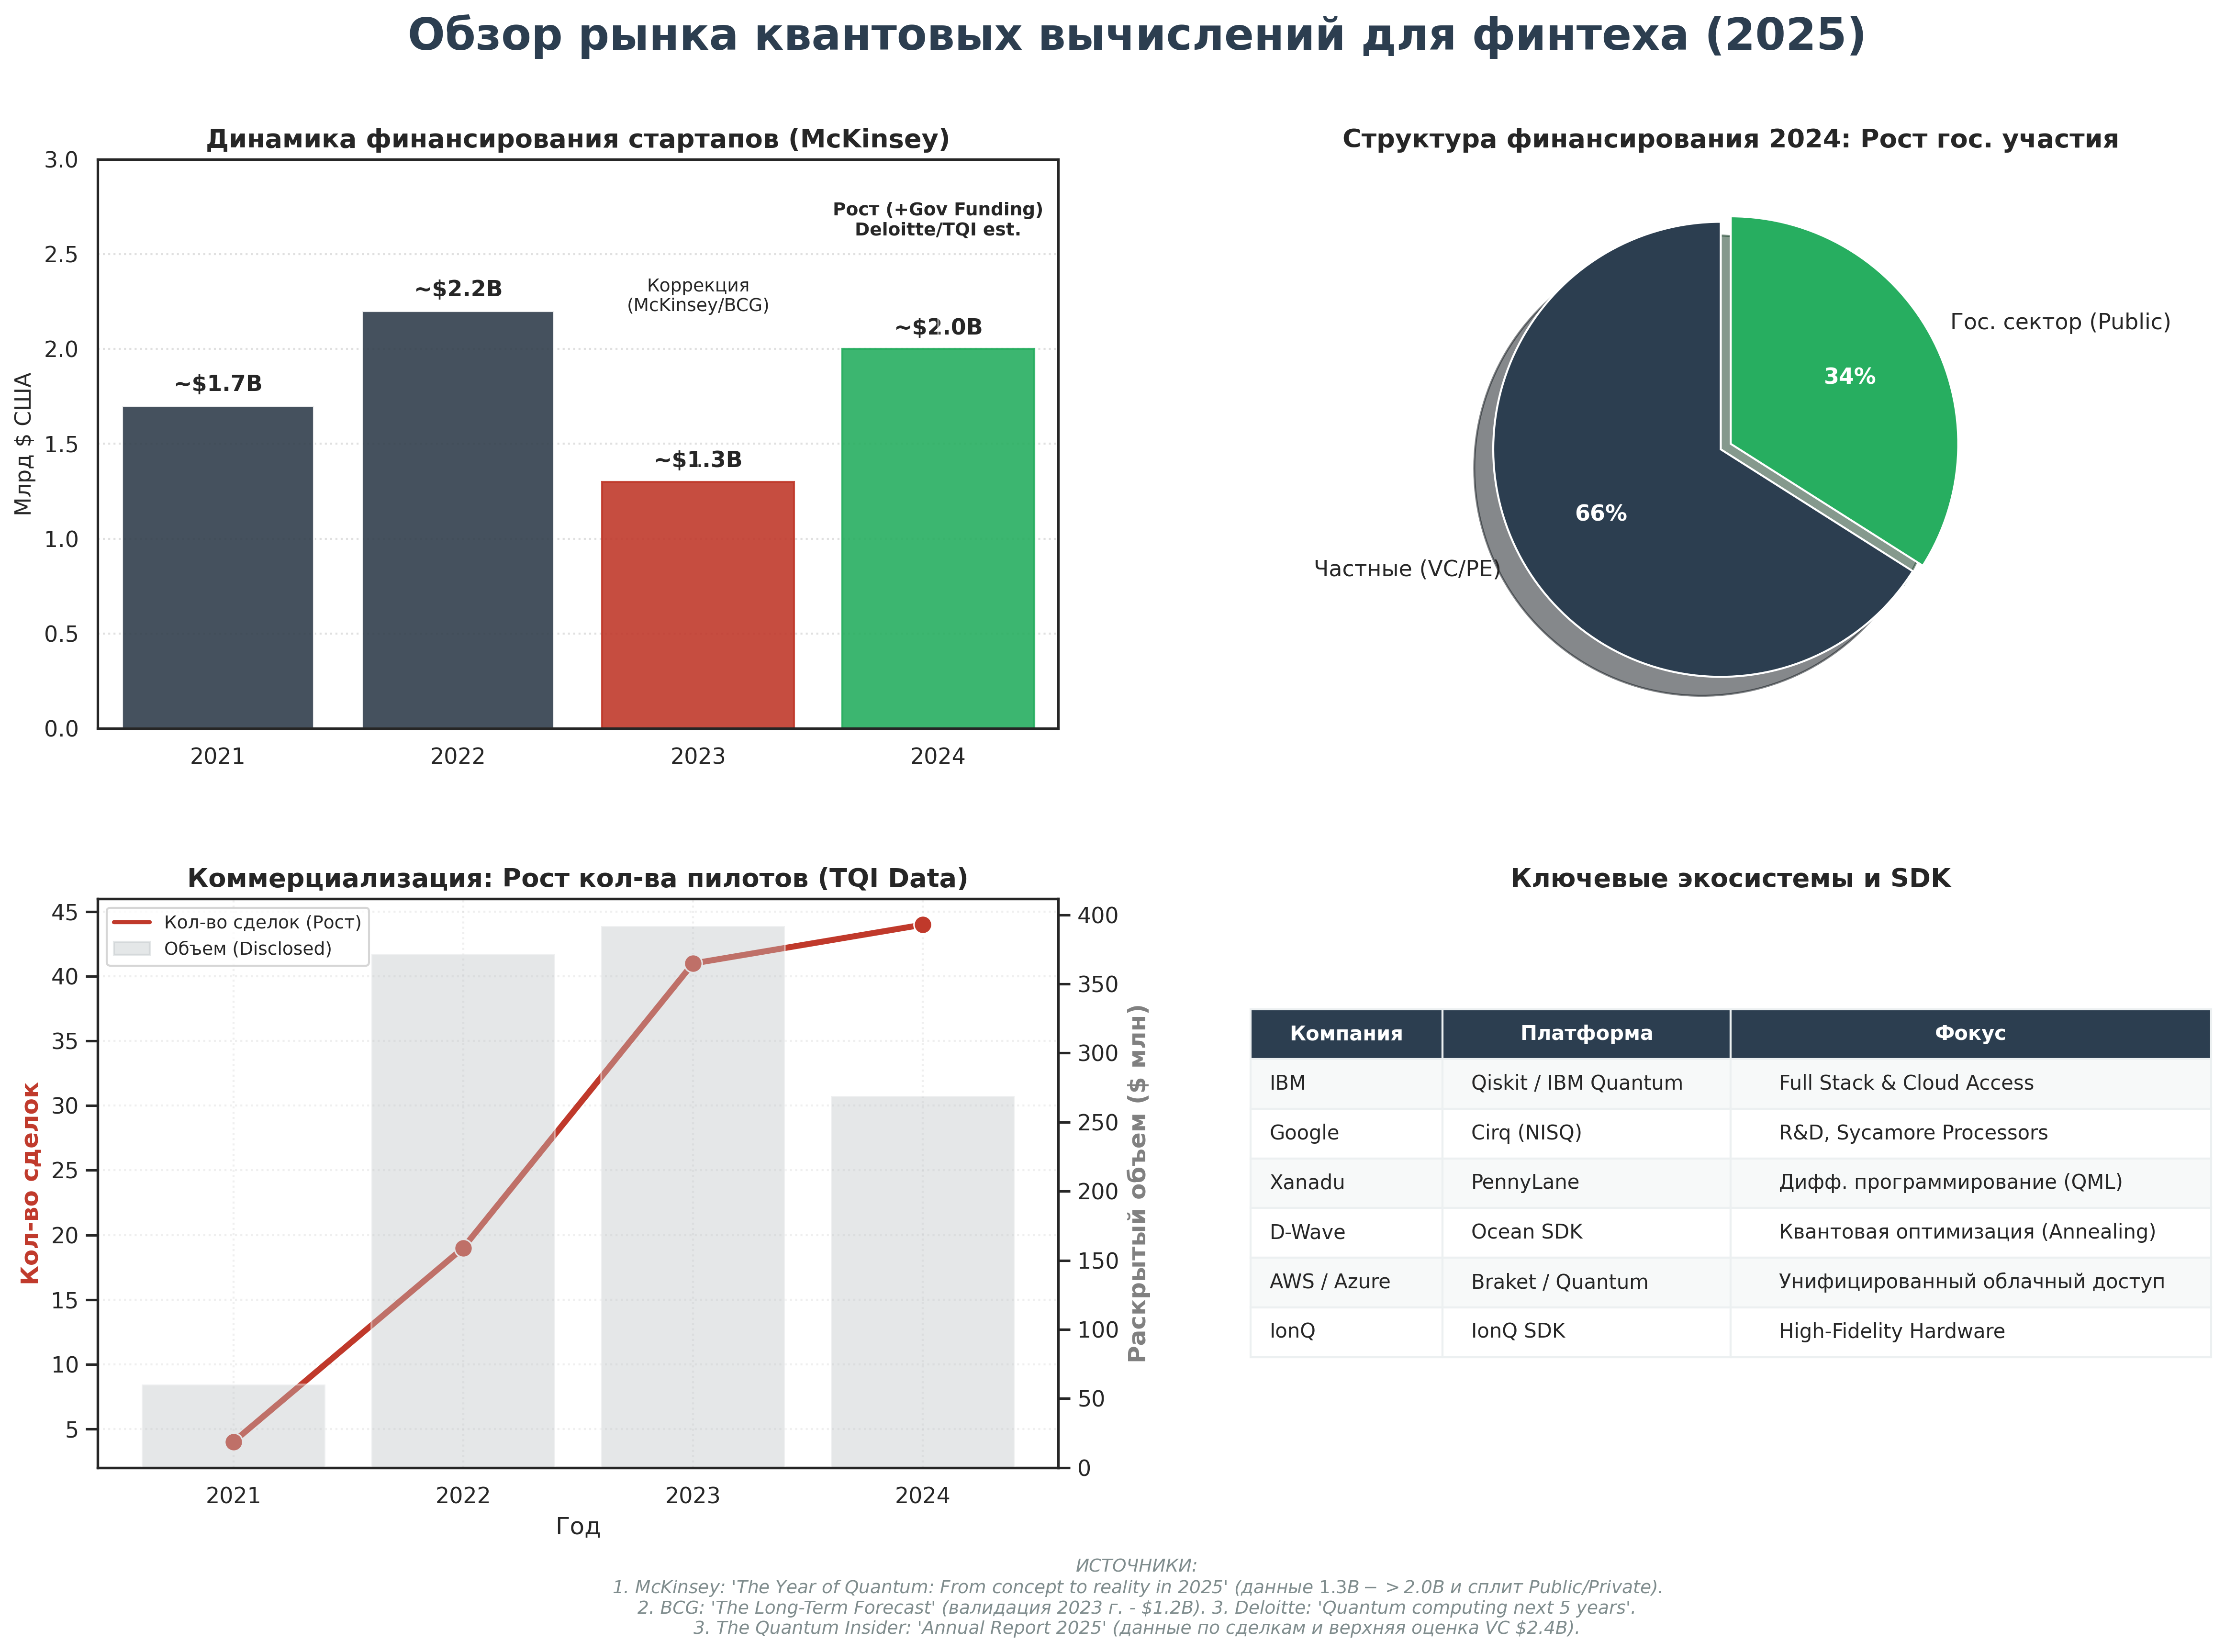



АНАЛИТИЧЕСКАЯ СПРАВКА: РЫНОК КВАНТОВЫХ ВЫЧИСЛЕНИЙ (Q1 2025)

1. МАКРОЭКОНОМИЧЕСКИЙ ОБЗОР И ДИНАМИКА КАПИТАЛА
Рынок завершил цикл коррекции (2023 г.) и демонстрирует V-образное восстановление.
Совокупный объем инвестиций в стартапы вырос с $1.3 млрд (2023) до ~$2.0 млрд (2024).

Ключевой драйвер роста — структурное изменение источников ликвидности:
• Государственное финансирование (Public Funding) заняло доминирующую роль в поддержке R&D.
• В 2024 году 34% всего притока капитала ($680 млн) обеспечено государственными грантами и субсидиями (без учета инфраструктурных вложений в размере $1.8 млрд).
• Частный венчурный капитал (VC) сохраняет осторожность, фокусируясь на зрелых проектах.

2. КОММЕРЦИАЛИЗАЦИЯ И СТРУКТУРА СДЕЛОК
Наблюдается дивергенция между количеством и объемом сделок:
• Количество коммерческих контрактов растет (44+ в 2024 году, CAGR +7% к 2023).
• Средний чек сделки (Average Ticket Size) снижается.
Вывод: Рынок переходит от фазы капиталоемких фундаментальных исследовани

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.patches as mpatches

# Стиль
sns.set_theme(style="white", rc={"axes.grid": True, "grid.linestyle": ":", "grid.alpha": 0.6})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['figure.dpi'] = 300

# ЧАСТЬ 1: ДАННЫЕ

# Данные по игрокам
players_data = [
    {"Компания": "IBM", "Платформа": "Qiskit / IBM Quantum", "Фокус": "Full Stack & Cloud Access"},
    {"Компания": "Google", "Платформа": "Cirq (NISQ)", "Фокус": "R&D, Sycamore Processors"},
    {"Компания": "Xanadu", "Платформа": "PennyLane", "Фокус": "Дифф. программирование (QML)"},
    {"Компания": "D-Wave", "Платформа": "Ocean SDK", "Фокус": "Квантовая оптимизация (Annealing)"},
    {"Компания": "AWS / Azure", "Платформа": "Braket / Quantum", "Фокус": "Унифицированный облачный доступ"},
    {"Компания": "IonQ", "Платформа": "IonQ SDK", "Фокус": "High-Fidelity Hardware"}
]
df_players = pd.DataFrame(players_data)

# McKinsey: Total Funding ($1.3B -> $2.0B)
investment_data = pd.DataFrame([
    {"Год": "2021", "Значение": 1.7}, # Исторические данные для контекста
    {"Год": "2022", "Значение": 2.2},
    {"Год": "2023", "Значение": 1.3}, # McKinsey data
    {"Год": "2024", "Значение": 2.0}, # McKinsey data (~$2.0B)
])

# McKinsey 2024 Split: $680M Public (34%) vs ~$1.3B Private
funding_split_2024 = pd.DataFrame([
    {"Тип": "Частные (VC/PE)", "Сумма": 1.32},
    {"Тип": "Гос. сектор (Public)", "Сумма": 0.68}
])

# TQI Data: Deals Dynamics
deals_data = pd.DataFrame([
    {"Год": "2021", "Количество": 4,  "Объем_млн": 60},
    {"Год": "2022", "Количество": 19, "Объем_млн": 372},
    {"Год": "2023", "Количество": 41, "Объем_млн": 392}, # TQI
    {"Год": "2024", "Количество": 44, "Объем_млн": 269}, # TQI (Снижение чека)
])


# ЧАСТЬ 2: ВИЗУАЛИЗАЦИЯ

def create_strategic_report():
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Заголовок
    fig.suptitle('Обзор рынка квантовых вычислений для финтеха (2025)',
                 fontsize=22, weight='bold', color='#2c3e50', y=0.96)

    # Цвета
    main_blue = "#2c3e50"
    alert_red = "#c0392b"
    gov_green = "#27ae60"

    # 1. ТРЕНД ИНВЕСТИЦИЙ (McKinsey)
    ax1 = axes[0, 0]
    bars = sns.barplot(data=investment_data, x="Год", y="Значение", color=main_blue, ax=ax1, alpha=0.9)

    # Подсветка 2023 (спад) и 2024 (рост)
    bars.patches[2].set_color(alert_red)
    bars.patches[3].set_color(gov_green) # Рост за счет госденег

    ax1.set_title("Динамика финансирования стартапов (McKinsey)", fontsize=13, weight='bold')
    ax1.set_ylabel("Млрд $ США", fontsize=11)
    ax1.set_xlabel("")
    ax1.set_ylim(0, 3.0)

    for p in ax1.patches:
        ax1.annotate(f'~${p.get_height()}B', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', weight='bold', fontsize=11, xytext=(0, 5), textcoords='offset points')

    # Аннотации
    ax1.annotate('Коррекция\n(McKinsey/BCG)', xy=(2, 1.3), xytext=(2, 2.2),
                 arrowprops=dict(facecolor='black', arrowstyle='->', alpha=0.5), ha='center', fontsize=9)
    ax1.annotate('Рост (+Gov Funding)\nDeloitte/TQI est.', xy=(3, 2.0), xytext=(3, 2.6),
                 arrowprops=dict(facecolor='black', arrowstyle='->', alpha=0.5), ha='center', fontsize=9, weight='bold')

    # 2. СТРУКТУРА 2024 (McKinsey Public vs Private)
    ax2 = axes[0, 1]
    colors = [main_blue, gov_green]
    wedges, texts, autotexts = ax2.pie(funding_split_2024["Сумма"], labels=funding_split_2024["Тип"],
                                       autopct='%1.0f%%', startangle=90, colors=colors, explode=(0.05, 0), shadow=True)
    ax2.set_title("Структура финансирования 2024: Рост гос. участия", fontsize=13, weight='bold')
    plt.setp(autotexts, size=11, weight="bold", color="white")

    # 3. КОММЕРЧЕСКИЕ СДЕЛКИ (TQI)
    ax3 = axes[1, 0]
    ax3_twin = ax3.twinx()

    sns.barplot(data=deals_data, x="Год", y="Объем_млн", color="#bdc3c7", ax=ax3_twin, alpha=0.4)
    sns.lineplot(data=deals_data, x="Год", y="Количество", marker="o", color=alert_red, ax=ax3, linewidth=3, markersize=9, sort=False)

    ax3.set_title("Коммерциализация: Рост кол-ва пилотов (TQI Data)", fontsize=13, weight='bold')
    ax3.set_ylabel("Кол-во сделок", color=alert_red, weight='bold')
    ax3_twin.set_ylabel("Раскрытый объем ($ млн)", color="gray", weight='bold')
    ax3.grid(True, alpha=0.3)
    ax3_twin.grid(False)

    # Легенда
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], color=alert_red, lw=2, label='Кол-во сделок (Рост)'),
                       mpatches.Patch(color='#bdc3c7', alpha=0.4, label='Объем (Disclosed)')]
    ax3.legend(handles=legend_elements, loc='upper left', fontsize=9)

    # 4. ЭКОСИСТЕМА (Таблица)
    ax4 = axes[1, 1]
    ax4.axis('off')
    ax4.set_title("Ключевые экосистемы и SDK", fontsize=13, weight='bold')

    table = ax4.table(cellText=df_players.values, colLabels=df_players.columns, loc='center', cellLoc='left', colWidths=[0.2, 0.3, 0.5])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2.2)

    for (row, col), cell in table.get_celld().items():
        cell.set_edgecolor('#ecf0f1')
        if row == 0:
            cell.set_text_props(weight='bold', color='white')
            cell.set_facecolor(main_blue)
        else:
            cell.set_facecolor('#f7f9f9' if row % 2 else 'white')

    # ИСТОЧНИКИ
    sources = (
        "ИСТОЧНИКИ:\n"
        "1. McKinsey: 'The Year of Quantum: From concept to reality in 2025' (данные $1.3B -> $2.0B и сплит Public/Private).\n"
        "2. BCG: 'The Long-Term Forecast' (валидация 2023 г. - $1.2B). 3. Deloitte: 'Quantum computing next 5 years'.\n"
        "3. The Quantum Insider: 'Annual Report 2025' (данные по сделкам и верхняя оценка VC $2.4B)."
    )
    fig.text(0.5, 0.02, sources, ha='center', fontsize=9, color='#7f8c8d', style='italic')

    # Layout
    plt.tight_layout(rect=[0, 0.06, 1, 0.95])
    plt.subplots_adjust(hspace=0.3, wspace=0.2)

    plt.savefig('Quantum_Market_Analysis_2025_Final.png', dpi=300, bbox_inches='tight')
    plt.show()


# ЧАСТЬ 3: ГЕНЕРАТОР СООБЩЕНИЯ

def print_executive_summary():
    # Форматирование таблиц для вывода
    def format_table(df, title):
        return f"\n--- {title} ---\n" + df.to_markdown(index=False, tablefmt="grid")

    report_text = f"""

АНАЛИТИЧЕСКАЯ СПРАВКА: РЫНОК КВАНТОВЫХ ВЫЧИСЛЕНИЙ (Q1 2025)

1. МАКРОЭКОНОМИЧЕСКИЙ ОБЗОР И ДИНАМИКА КАПИТАЛА
Рынок завершил цикл коррекции (2023 г.) и демонстрирует V-образное восстановление.
Совокупный объем инвестиций в стартапы вырос с $1.3 млрд (2023) до ~$2.0 млрд (2024).

Ключевой драйвер роста — структурное изменение источников ликвидности:
• Государственное финансирование (Public Funding) заняло доминирующую роль в поддержке R&D.
• В 2024 году 34% всего притока капитала ($680 млн) обеспечено государственными грантами и субсидиями (без учета инфраструктурных вложений в размере $1.8 млрд).
• Частный венчурный капитал (VC) сохраняет осторожность, фокусируясь на зрелых проектах.

2. КОММЕРЦИАЛИЗАЦИЯ И СТРУКТУРА СДЕЛОК
Наблюдается дивергенция между количеством и объемом сделок:
• Количество коммерческих контрактов растет (44+ в 2024 году, CAGR +7% к 2023).
• Средний чек сделки (Average Ticket Size) снижается.
Вывод: Рынок переходит от фазы капиталоемких фундаментальных исследований к фазе прикладных пилотных проектов (Proof of Concept) с меньшим бюджетом, но более высокой частотой внедрения.

ПРИЛОЖЕНИЕ: СВОДНЫЕ ДАННЫЕ (DATA TABLES)

"""
    print(report_text)

    # Вывод таблиц
    try:
        print("\nТаблица 1. Динамика инвестиций (млрд $)")
        print(investment_data.to_string(index=False))

        print("\nТаблица 2. Структура финансирования (2024)")
        print(funding_split_2024.to_string(index=False))

        print("\nТаблица 3. Коммерческая активность (Сделки)")
        print(deals_data.to_string(index=False))

        print("\nТаблица 4. Ключевые технологические партнеры")
        # Выбираем только важные колонки для компактности
        print(df_players[["Компания", "Платформа", "Фокус"]].to_string(index=False))

    except Exception as e:
        print(f"Ошибка вывода таблиц: {e}")

    print("\n============================================================")

if __name__ == "__main__":
    create_strategic_report()
    print_executive_summary()

# [Прогноз развития рынка]

# Conclusion